# Spherical Smoothing 

load basic library

In [1]:
%config IPCompleter.greedy = True
%matplotlib inline
%config InlineBackend.figure_format='retina'

%load_ext autoreload
%autoreload 2
    
import warnings
warnings.filterwarnings("ignore")

import senpy as sp

import numpy  as np
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt

from xspharm import xspharm
plt.style.use('science')


## Load 850-hPa wind fields from ERA5 reanagsis

In [2]:
uv_ds = sp.ERA5_pressuelevel_vars(vars=['u', 'v'],time_slice= slice('1979-01', '2022-12')).sel(lev=850).mean('time').load()

## Smooth data using xspharm.truncate 

In [3]:
xsp = xspharm(uv_ds, gridtype='regular')

# truncate using total wavenumber 24
sm_24 = xsp.truncate(uv_ds, ntrunc=24)

# truncate using total wavenumber 6
sm_6 = xsp.truncate(uv_ds, ntrunc=6)

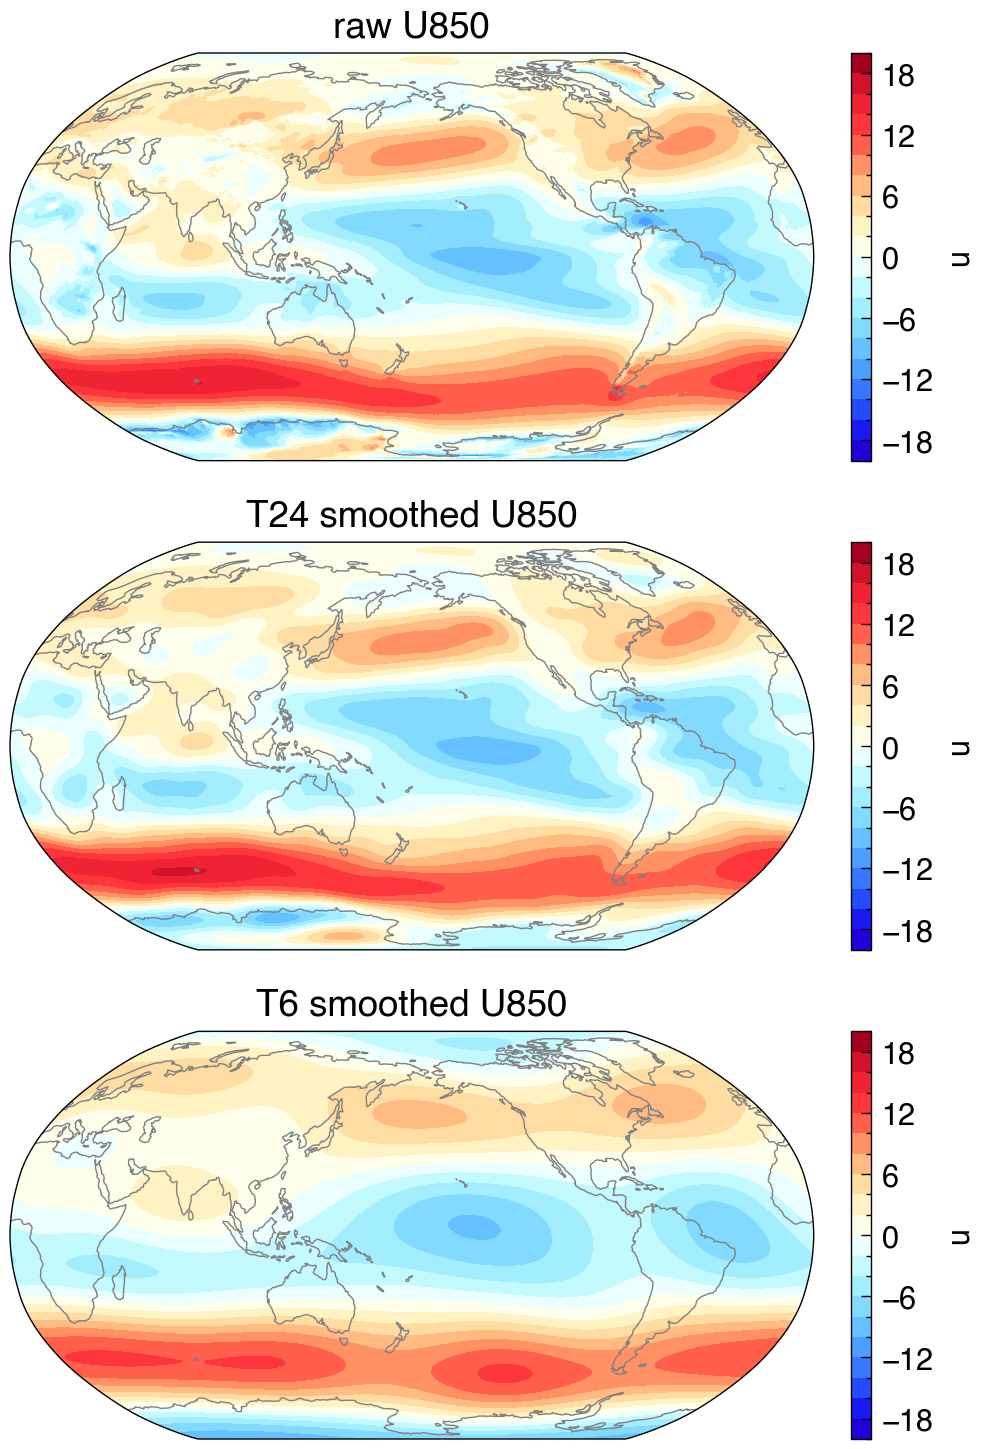

In [4]:
u_clevs = np.arange(-20, 20.01, step=2)

fig, axes = sp.map_subplots(3, 1, figsize=(12, 9), proj='robin', lon_0=180, aspect=1)
group_ds = [uv_ds['u'], sm_24['u'], sm_6['u']]
group_titles = ['raw U850', 'T24 smoothed U850', 'T6 smoothed U850']

for i, ax in enumerate(axes.flat):
    sp.add_cyclic_point(group_ds[i], dim='lon').plot.contourf(ax=axes[i], transform=sp.data_crs, **sp.cmap.dict_cmap_contourf(levels=u_clevs), cbar_kwargs={'pad': 0.02})
    ax.set_title(group_titles[i])
    sp.map_coastline(ax)

## Smooth data using xspharm.exp_taper 

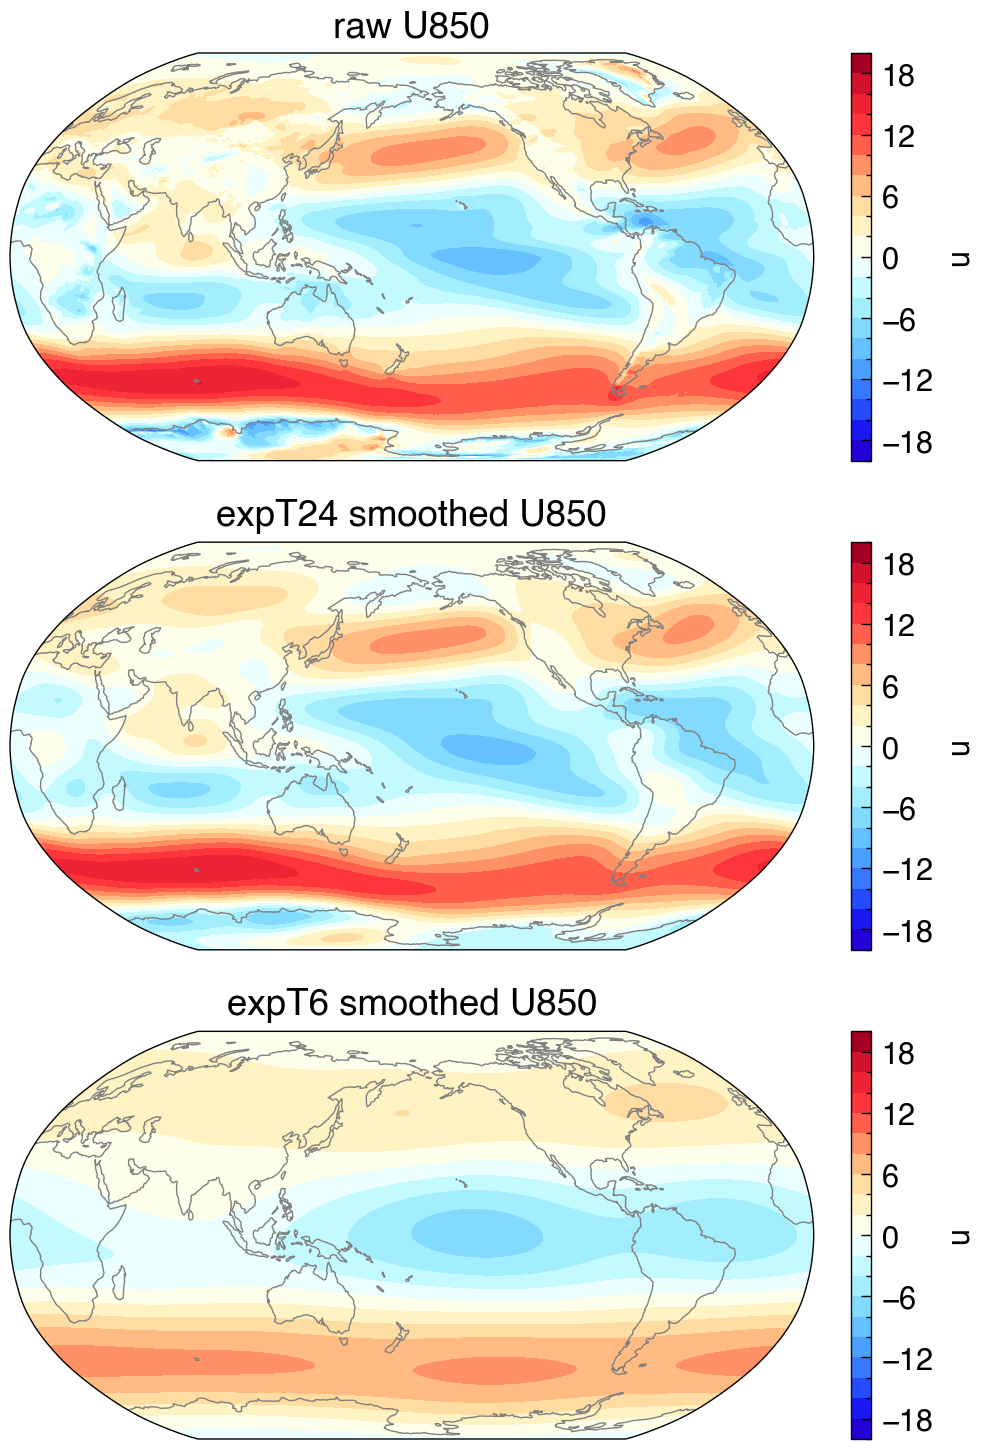

In [5]:
# truncate using total wavenumber 24
et_24 = xsp.exp_taper(uv_ds, ntrunc=24)

# truncate using total wavenumber 6
et_6 = xsp.exp_taper(uv_ds, ntrunc=6)

u_clevs = np.arange(-20, 20.01, step=2)

fig, axes = sp.map_subplots(3, 1, figsize=(12, 9), proj='robin', lon_0=180, aspect=1)
group_ds = [uv_ds['u'], et_24['u'], et_6['u']]
group_titles = ['raw U850', 'expT24 smoothed U850', 'expT6 smoothed U850']

for i, ax in enumerate(axes.flat):
    sp.add_cyclic_point(group_ds[i], dim='lon').plot.contourf(ax=axes[i], transform=sp.data_crs, **sp.cmap.dict_cmap_contourf(levels=u_clevs), cbar_kwargs={'pad': 0.02})
    ax.set_title(group_titles[i])
    sp.map_coastline(ax)
    